In [22]:
from sklearn.pipeline import make_pipeline, make_union
from sklearn.preprocessing import RobustScaler, StandardScaler,MinMaxScaler, FunctionTransformer, OneHotEncoder
from src.pipelines import get_pipeline, get_data_preparation_pipeline
from src.loaders.data_loader import get_train_data
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import pandas as pd
import joblib
import seaborn as sns
import numpy as np
from src.transformation_utils.select_columns import SelectColumns
%matplotlib inline

In [2]:
#TODO: try some features importances, scalers and models

In [3]:
features = [
    "Census_MDC2FormFactor",
    "Census_DeviceFamily",
    "Census_OEMNameIdentifier",
    "Census_OEMModelIdentifier",
    "Census_ProcessorCoreCount",
    "Census_ProcessorManufacturerIdentifier",
    "Census_ProcessorModelIdentifier",
    "Census_ProcessorClass",
    "Census_PrimaryDiskTotalCapacity",
    "Census_PrimaryDiskTypeName",
    "Census_SystemVolumeTotalCapacity",
    "Census_HasOpticalDiskDrive",
    "Census_TotalPhysicalRAM",
    "Census_ChassisTypeName",
    "Census_InternalPrimaryDiagonalDisplaySizeInInches",
    "Census_InternalPrimaryDisplayResolutionHorizontal",
    "Census_InternalPrimaryDisplayResolutionVertical",
    "Census_GenuineStateName",
    "Census_ActivationChannel",
    "Census_FirmwareManufacturerIdentifier",
    "Census_FirmwareVersionIdentifier",
    "Census_IsTouchEnabled",
    "Census_IsPenCapable",
    "Census_IsAlwaysOnAlwaysConnectedCapable",
    "Wdft_IsGamer"
]

In [4]:
X, y = get_train_data(sample_size=0.005)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [5]:
columns_numeric_hardware_features =["Census_TotalPhysicalRAM",
                       "Census_ProcessorCoreCount",
                       "Census_PrimaryDiskTotalCapacity",
                       "Census_SystemVolumeTotalCapacity"
                       ]

categorial_features = [
    "Census_MDC2FormFactor",
    "Census_ActivationChannel",
    "Census_GenuineStateName",
    "Census_IsTouchEnabled",
    "Census_IsPenCapable",
    "Census_IsAlwaysOnAlwaysConnectedCapable",
    "Wdft_IsGamer"
]

identifier_features = [
    "Census_OEMNameIdentifier",
    "Census_OEMModelIdentifier"    
]

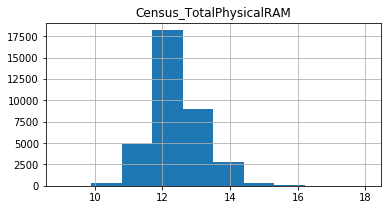

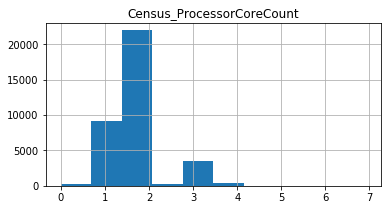

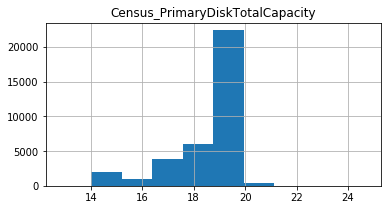

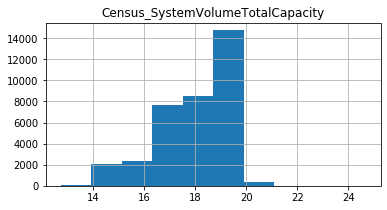

In [6]:
for column in columns_numeric_hardware_features:
    fig, ax = plt.subplots(figsize=(6, 3))
    ax.set_title(column)
    np.log2(X_train[column]).hist()
    plt.show()

In [7]:
def check_pipeline_performance(pipeline, X_test, y_test):
    class_names = ["No","Yes"]
    disp = plot_confusion_matrix(pipeline, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize='true')

    disp.ax_.set_title("Model performance")

    print("Model performance")
    
    print(disp.confusion_matrix)

    plot_roc_curve(pipeline, X_test, y_test)
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
            label='Chance', alpha=.8)
    plt.show()
    plot_precision_recall_curve(pipeline, X_test, y_test)

In [8]:
#TODO: select the best scaler: MinMax, Standard, or Rubust

In [10]:
preparation_pipeline_numeric_hardware = make_pipeline(
        SelectColumns(columns_numeric_hardware_features),
        SimpleImputer(missing_values=np.nan, strategy="median"),
        SimpleImputer(missing_values=-1, strategy="median"),
        FunctionTransformer(np.log2),
        MinMaxScaler(),
)
fitted = preparation_pipeline_numeric_hardware.fit_transform(X_train, y_train)
fitted_df = pd.DataFrame(fitted, columns=columns_numeric_hardware_features)
fitted_df.head()

,Census_TotalPhysicalRAM,Census_ProcessorCoreCount,Census_PrimaryDiskTotalCapacity,Census_SystemVolumeTotalCapacity
0,0.333333,0.144783,0.454776,0.459378
1,0.333333,0.144783,0.171181,0.176480
2,0.333333,0.289566,0.539292,0.323962
3,0.333333,0.289566,0.424676,0.429799
4,0.333333,0.289566,0.509192,0.513673


In [11]:
fitted_df["HasDetections"] = y_train

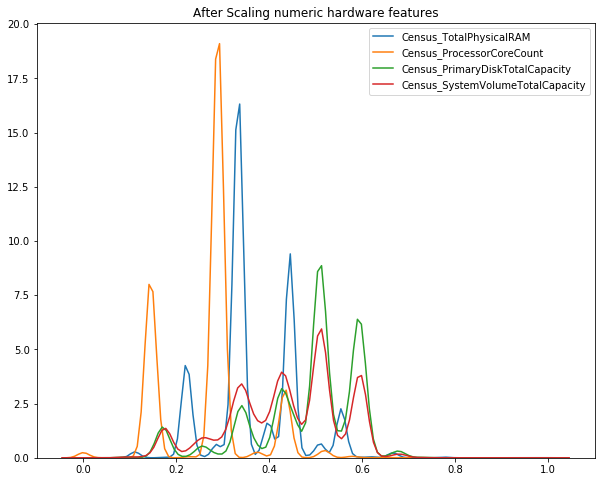

In [13]:
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('After Scaling numeric hardware features')
for column in columns_numeric_hardware_features:
    sns.kdeplot(fitted_df[column], ax=ax1)
#fitted_df.hist()
#joblib.dump(pipeline,"model.joblib")

In [14]:
print(fitted_df[fitted_df["HasDetections"] == 1].mean())
print(fitted_df[fitted_df["HasDetections"] == 0].mean())

Census_TotalPhysicalRAM             0.368273
Census_ProcessorCoreCount           0.268684
Census_PrimaryDiskTotalCapacity     0.478623
Census_SystemVolumeTotalCapacity    0.437547
HasDetections                       1.000000
dtype: float64
Census_TotalPhysicalRAM             0.367492
Census_ProcessorCoreCount           0.267681
Census_PrimaryDiskTotalCapacity     0.479963
Census_SystemVolumeTotalCapacity    0.438217
HasDetections                       0.000000
dtype: float64


In [18]:
fitted_with_y = fitted_df
fitted_with_y["HasDetections"] = y_train
fitted_with_y.corr()

,Census_TotalPhysicalRAM,Census_ProcessorCoreCount,Census_PrimaryDiskTotalCapacity,Census_SystemVolumeTotalCapacity,HasDetections
Census_TotalPhysicalRAM,1.000000,0.570853,0.282376,0.312295,0.004192
Census_ProcessorCoreCount,0.570853,1.000000,0.112134,0.114294,0.005429
Census_PrimaryDiskTotalCapacity,0.282376,0.112134,1.000000,0.803869,-0.005839
Census_SystemVolumeTotalCapacity,0.312295,0.114294,0.803869,1.000000,-0.002820
HasDetections,0.004192,0.005429,-0.005839,-0.002820,1.000000


In [19]:
not_fitted_with_y = X_train[columns_numeric_hardware_features]
not_fitted_with_y["HasDetections"] = y_train
not_fitted_with_y.corr()

/home/yaron/anaconda3/envs/microsoft-challenge/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Census_TotalPhysicalRAM,Census_ProcessorCoreCount,Census_PrimaryDiskTotalCapacity,Census_SystemVolumeTotalCapacity,HasDetections
Census_TotalPhysicalRAM,1.000000,0.624894,0.129815,0.134934,0.057757
Census_ProcessorCoreCount,0.624894,1.000000,0.095188,0.068826,0.053939
Census_PrimaryDiskTotalCapacity,0.129815,0.095188,1.000000,0.797571,0.052914
Census_SystemVolumeTotalCapacity,0.134934,0.068826,0.797571,1.000000,0.015207
HasDetections,0.057757,0.053939,0.052914,0.015207,1.000000


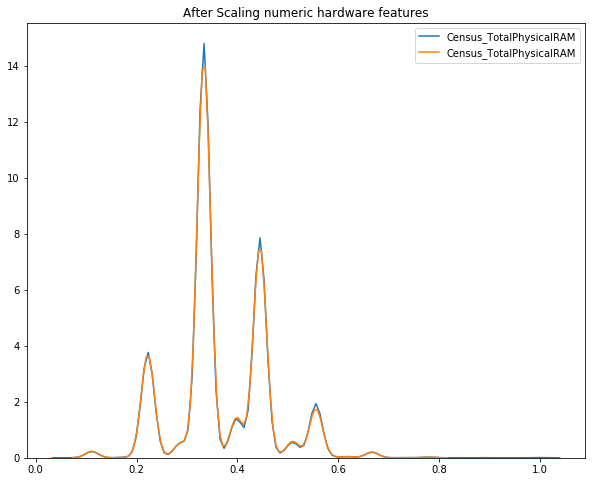

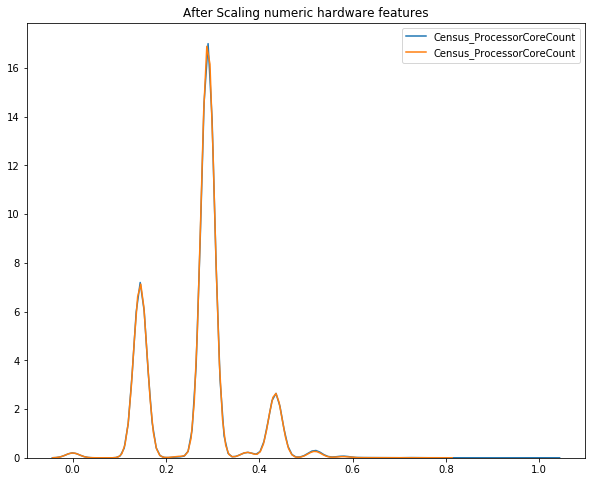

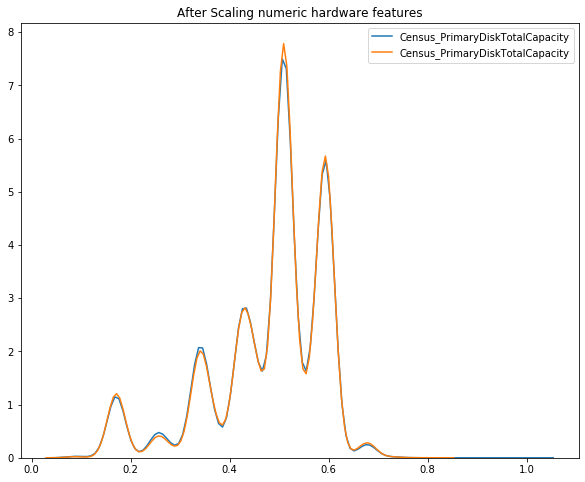

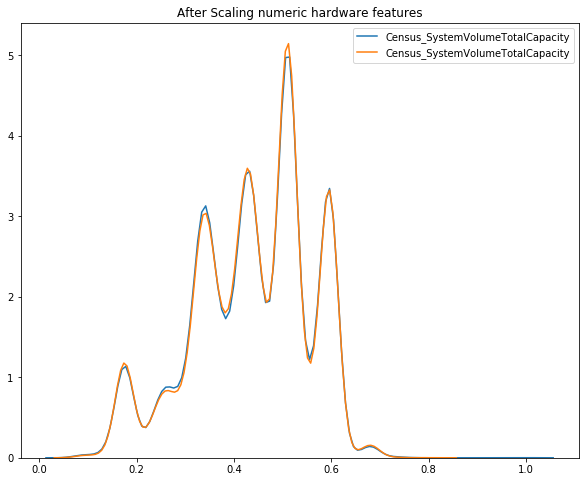

In [15]:
for column in columns_numeric_hardware_features:
    fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
    ax1.set_title('After Scaling numeric hardware features')
    sns.kdeplot(fitted_df[fitted_df["HasDetections"] == 1][column], ax=ax1)
    sns.kdeplot(fitted_df[fitted_df["HasDetections"] == 0][column], ax=ax1)

Model performance
[[0.44095023 0.55904977]
 [0.3612704  0.6387296 ]]


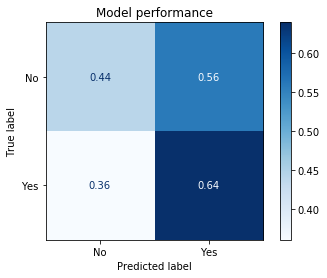

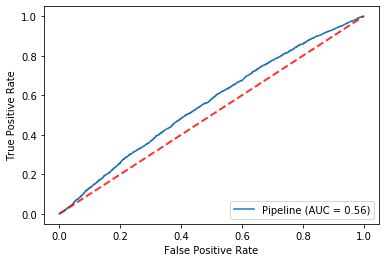

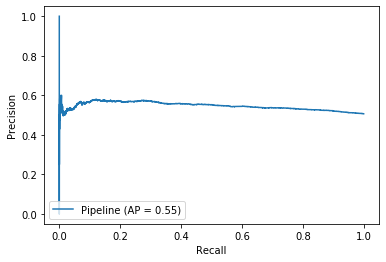

In [16]:
full_pipeline = make_pipeline(
    preparation_pipeline_numeric_hardware,
    SVC(C=1.0, kernel='rbf')
)
full_pipeline = full_pipeline.fit(X_train, y_train)
check_pipeline_performance(full_pipeline, X_test, y_test)

In [17]:
#TODO: check correlation between categorial features

In [25]:
classifiers = {
    "svm": SVC(C=1.0, kernel='rbf'),
    "random_forest": RandomForestClassifier()
}

svm
Model performance
[[0.61855204 0.38144796]
 [0.5533745  0.4466255 ]]


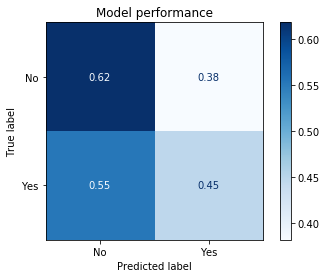

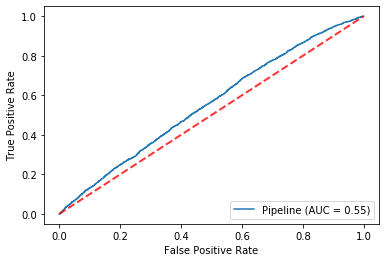

random_forest


In [ ]:
for classifier_name, classifier in classifiers.items():
    print(classifier_name)
    full_pipeline = make_pipeline( 
        make_union(
            preparation_pipeline_numeric_hardware,
            make_pipeline(
                SelectColumns(categorial_features),
                SimpleImputer(strategy='most_frequent'),
                OneHotEncoder()
            )
        ),
        classifier
    )
    full_pipeline = full_pipeline.fit(X_train, y_train)
    check_pipeline_performance(full_pipeline, X_test, y_test)

In [21]:
def plot_coefficients(classifier, feature_names, top_features=20):
 coef = classifier.coef_.ravel()
 top_positive_coefficients = np.argsort(coef)[-top_features:]
 top_negative_coefficients = np.argsort(coef)[:top_features]
 top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
 # create plot
 plt.figure(figsize=(15, 5))
 colors = [‘red’ if c < 0 else ‘blue’ for c in coef[top_coefficients]]
 plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
 feature_names = np.array(feature_names)
 plt.xticks(np.arange(1, 1 + 2 * top_features), feature_names[top_coefficients], rotation=60, ha=’right’)
 plt.show()
cv = CountVectorizer()
cv.fit(data)
X_train = cv.transform(data)

svm = LinearSVC()
svm.fit(X_train, target)
plot_coefficients(svm, cv.get_feature_names())

SyntaxError: invalid character in identifier (<ipython-input-21-3d564862f08f>, line 8)

In [ ]:
fitted_df.describe()

In [ ]:
pipeline = get_pipeline()
pipeline = pipeline.fit(X_train, y_train)

In [ ]:
def f_importances(coef, names):
    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.show()
    
f_importances(pipeline.coef_, features_names=["Y","X","Z"])

In [ ]:
pipeline.pic

In [ ]:
preparation_pipeline = get_data_preparation_pipeline()
X_transformed = preparation_pipeline.fit_transform(X_train, y_train)

In [ ]:
X_transformed.shape
df = pd.DataFrame.sparse.from_spmatrix(X_transformed)
df
df['HasDetections'] = y_train

corr = df.corr()
fig, ax = plt.subplots(figsize=(16, 12))
ax = sns.heatmap(corr, annot=True, ax=ax)
ax.set_title("Pearson Correlation between Variables")
ax